In [9]:
%pylab inline

import pandas as pd
import core

import sys
sys.path.append('../Core/')
import risk

rcParams['figure.figsize'] = (12,8)
rcParams['axes.grid'] = True

Populating the interactive namespace from numpy and matplotlib


In [18]:
from importlib import reload
reload(risk)
reload(core)

<module 'core' from '/Users/isaacdrachman/GitHub/Trading/core.py'>

In [19]:
def palladium(R,K):
    return max(np.mean(np.abs(R-np.mean(R))) - K, 0)

In [20]:
tickers = ['AAPL','NFLX','BAC','PEP','PG','GS']
data   = risk.get_data(tickers)
stocks = risk.get_prices(data)

https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=PG&outputsize=full&apikey=KWVBOGQGJ1O3KOGI


total pnl   : 7.62m
pnl/year    : 0.72m
return/year : 286.8%


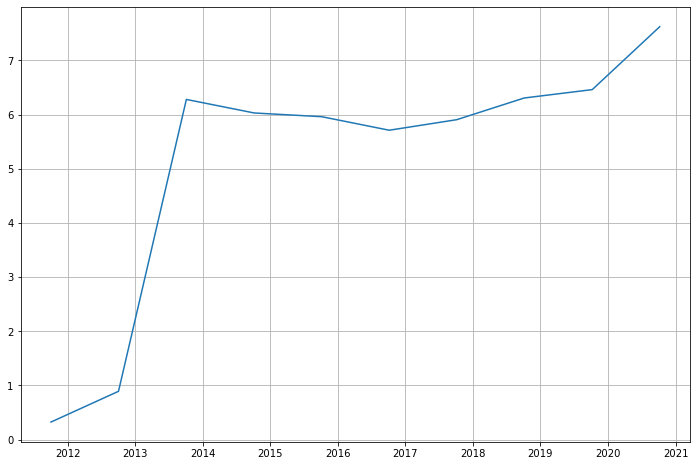

In [21]:
start_date = '2010-10-03'
T = 252; K = 0.15; notional = 5e6; premium = 0.05
trade_count = int(len(stocks.loc[start_date:])/T)
trade_entries = np.arange(trade_count)*T

R = (stocks.loc[start_date:]/stocks.loc[start_date:].shift(T)).iloc[T:]

backtested = notional*(R.iloc[trade_entries].apply(lambda r: palladium(r,K),axis=1) - premium)
plot(backtested.cumsum()/1e6)
print('total pnl   : %0.2fm'%(backtested.sum()/1e6))
print('pnl/year    : %0.2fm'%(backtested.sum()/1e6/len(stocks.loc[start_date:])*252))
print('return/year : %0.1f%%'%(100*backtested.sum()/len(stocks.loc[start_date:])*252/(premium*notional)))

average pnl : 478k
max gain    : 5,857k
max loss    : -150k
win percent : 68.2%
pnl z-score : 0.55


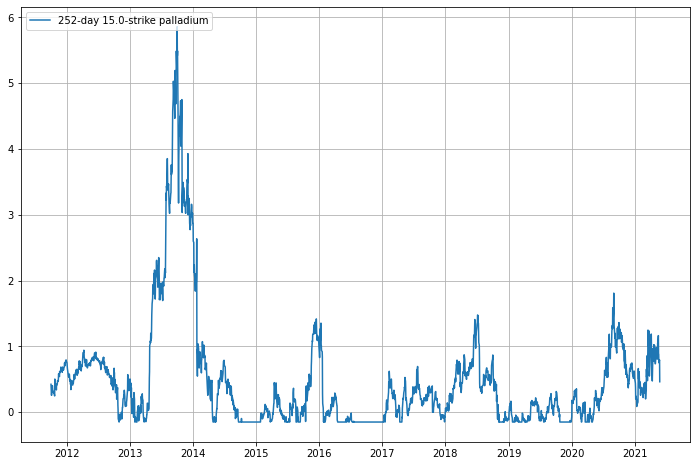

In [22]:
# Overall stats
start_date = '2010-10-03'
T = 252; K = 0.15; notional = 5e6; premium = 0.03

R = (stocks.loc[start_date:]/stocks.loc[start_date:].shift(T)).iloc[T:]
backtested = notional*(R.apply(lambda r: palladium(r,K),axis=1) - premium)
plot(backtested/1e6,label='%d-day %0.1f-strike palladium'%(T,K*100))
legend(loc='upper left')
print('average pnl : {:,.0f}k'.format(backtested.mean()/1e3))
print('max gain    : {:,.0f}k'.format(backtested.max()/1e3))
print('max loss    : {:,.0f}k'.format(backtested.min()/1e3))
print('win percent : {:,.1f}%'.format((len(backtested.loc[backtested > 0])/len(backtested))*100))
print('pnl z-score : {:.2f}'.format(backtested.mean()/backtested.std()))